# 2-dimensional plots of functions with SageMath

In [1]:
%display latex

## Plot of a symbolic function

A minimal plot:

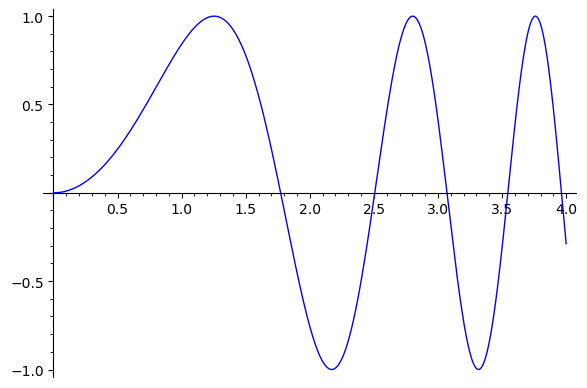

In [2]:
plot(sin(x^2), (x, 0, 4))

Adding some options:

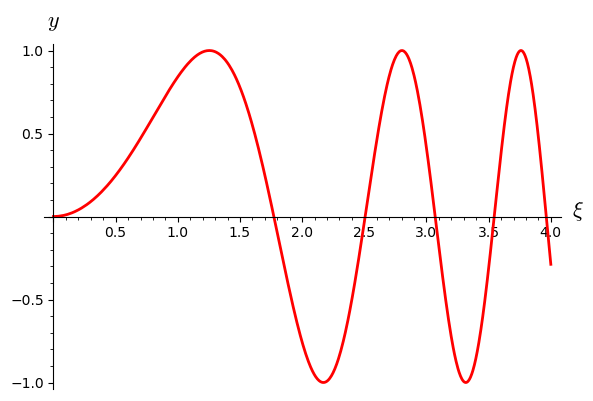

In [3]:
plot(sin(x^2), (x,0,4), color='red', thickness=2, axes_labels=[r"$\xi$", r"$y$"])

The list of options, along with some examples of use, is accessible via `?`:

In [4]:
#plot?

It is also accessible [online](http://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html#sage.plot.plot.plot).

Storing the graphic object in a Python variable:

In [5]:
g1 = plot(sin(x^2), (x,0,4), color='red', thickness=2, axes_labels=[r"$x$", r"$y$"])

In [6]:
type(g1)

<class 'sage.plot.graphics.Graphics'>

In [7]:
print(g1)

Graphics object consisting of 1 graphics primitive


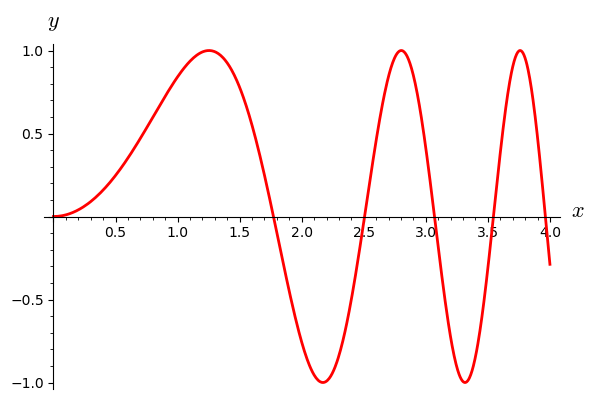

In [8]:
g1

Plot objects can be added:

In [9]:
g2 = plot(cos(x^2), (x,0,4), color='green', linestyle='--',
          thickness=2)

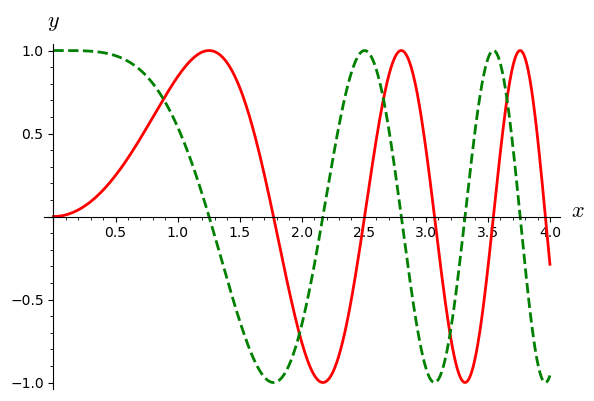

In [10]:
g1 + g2

The command `show` can be used to display the object `g1+g2` with extra options:

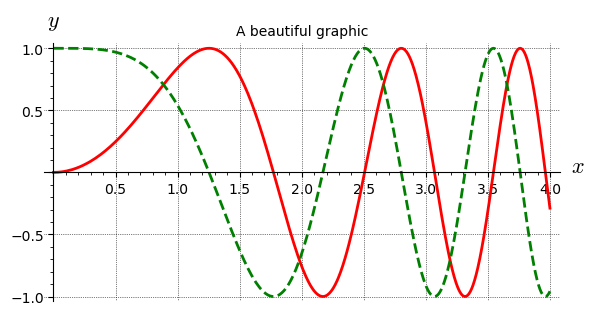

In [11]:
show(g1+g2, gridlines=True, aspect_ratio=1, title='A beautiful graphic')

If you prefer a framed view, add the options `frame=True` and `axes=False`:

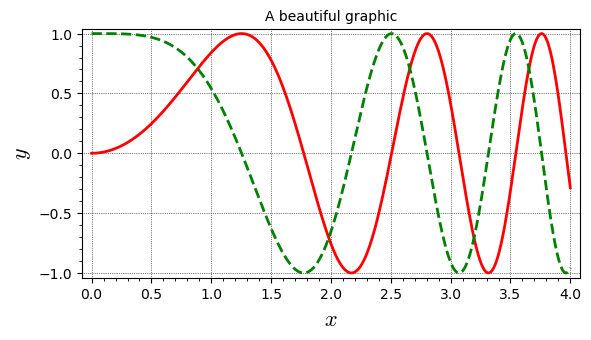

In [12]:
show(g1+g2, gridlines=True, aspect_ratio=1, title='A beautiful graphic',
     frame=True, axes=False)

The documentation for all possible options of `show` is obtained via `show?`:

In [13]:
# g1.show?

It is also accessible online [here](http://doc.sagemath.org/html/en/reference/plotting/sage/plot/graphics.html#sage.plot.graphics.Graphics.show).

Saving the plot in a pdf file, with the same options as in show (uncomment the lines to make it effective):

In [14]:
(g1+g2).save("plot_sinx2_cosx2.pdf", 
             gridlines=True, aspect_ratio=1, title='A beautiful graphic')

Superposing graphic objects with a Python loop:

In [15]:
#chebyshev_T?

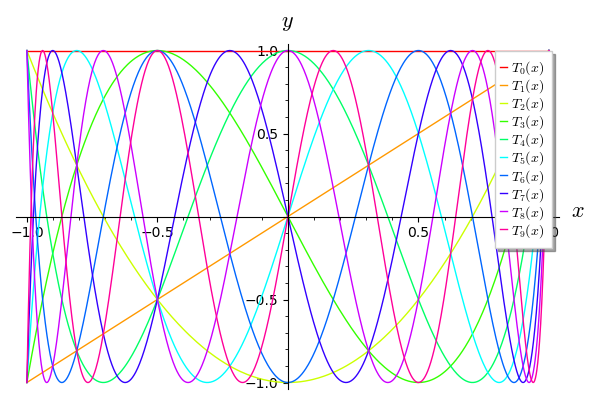

In [16]:
g = Graphics()  # an empty graphic object
for i in range(10):
    g += plot(chebyshev_T(i,x), (x,-1,1), color=hue(i/10),
              legend_label=r"$T_{}(x)$".format(i))
show(g, axes_labels=[r"$x$", r"$y$"], legend_loc='upper right')

*Side remark:* in the above code, we have implicitely redefined the Python variable `i` as an integer denoting the loop index, while `i` was predefined as the imaginary number $i$ such that $i^2=-1$. 
Consequently, we have now

In [17]:
i

9

In [18]:
e^(i*pi)

e^(9*pi)

To restore the use of the Python name `i` for the imaginary number, it suffices to run

In [19]:
restore('i')

In [20]:
e^(i*pi)

-1

Another option would be to use `I`, which, as `i`, is a predefined Python variable for the imaginary $i$:

In [21]:
I^2

-1

### Symbolic functions versus Python functions

Let us consider a symbolic function (actually a *callable symbolic expression* in Sage's semantics):

In [22]:
f(x) = sin(x^2)

In [23]:
f

x |--> sin(x^2)

In [24]:
f(x)

sin(x^2)

In [25]:
f(3)

sin(9)

We can plot `f(x)` as we did above for `sin(x^2)`:

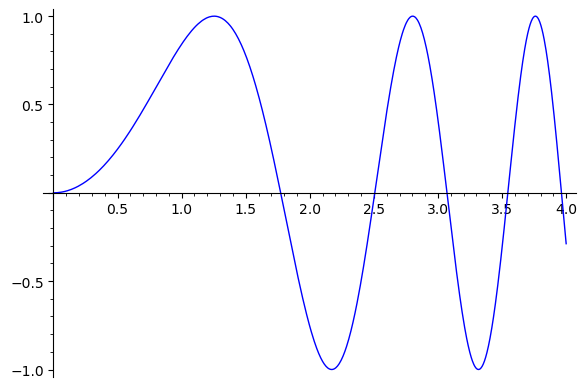

In [26]:
plot(f(x), (x,0,4))

It is also possible to pass the function `f` itself (not the symbolic expression `f(x)`), along with the lower and upper boundaries for the argument of `f` required in the plot, without having to specify any name for this argument:

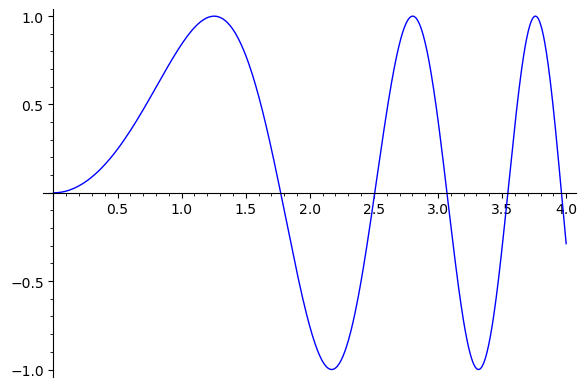

In [27]:
plot(f, (0,4))

This second way of plotting function is actually the one that must be used for the plot of Python functions:

In [28]:
def f1(x):
    if x<2:
        return sin(x)
    return cos(x)

In [29]:
f1

<function f1 at 0x7fa3ed97d550>

In [30]:
f1(1)

sin(1)

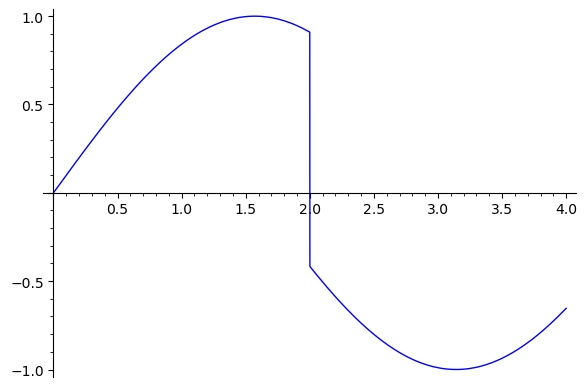

In [31]:
plot(f1, (0,4))

Actually, if we use the first method, we obtain a strange result:

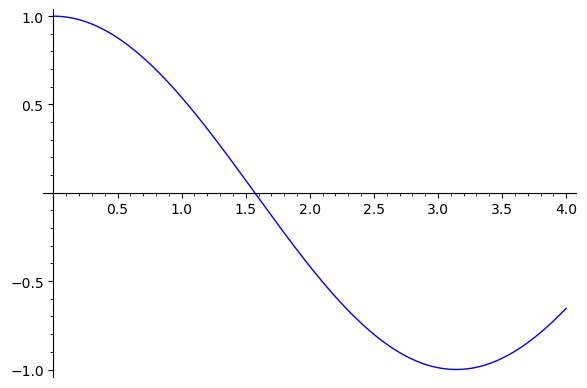

In [32]:
plot(f1(x), (x,0,4))

This occurs because the argument `f1(x)` of the function `plot` is evaluated prior to any loop on the values of `x` within the specified interval. Since for the symbolic variable `x` one has

In [33]:
bool(x<2)

False

the function `f1` always returns `cos(x)`, hence the plot.

What about plotting Python functions with more than one argument? For instance suppose we want to plot the following function for some fixed value of the argument `a`:

In [34]:
def f2(x, a):
    if x<a:
        return a*sin(x)
    return a*cos(x)

`plot(f2, (0,4))` returns an error (and an empty plot!) here:

verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'f2() missing 1 required positional argument: 'a''


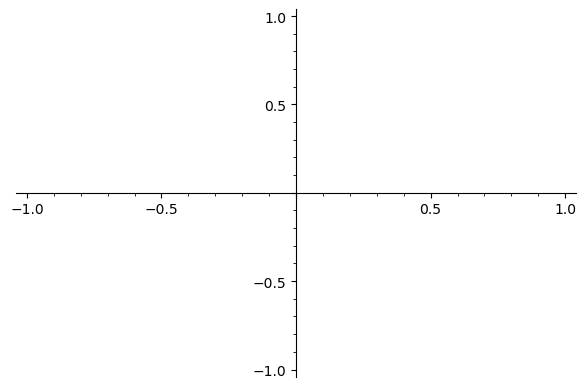

In [35]:
plot(f2, (0,4))

A first solution would be to wrap `f2` into a single-argument Python function:

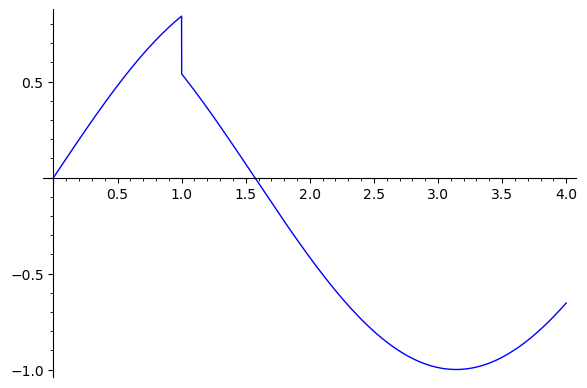

In [36]:
def f2_wrap(x):
    a = 1
    return f2(x,a)
plot(f2_wrap, (0,4))

A better solution is to use create an **anonymous function** with the Python keyword `lambda`:

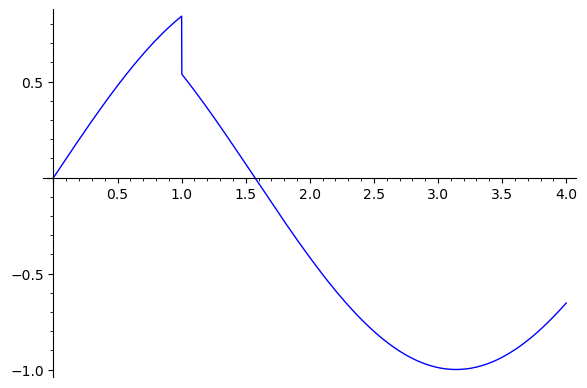

In [37]:
plot(lambda x: f2(x, 1), (0,4))

In particular, it is very usefull in loops:

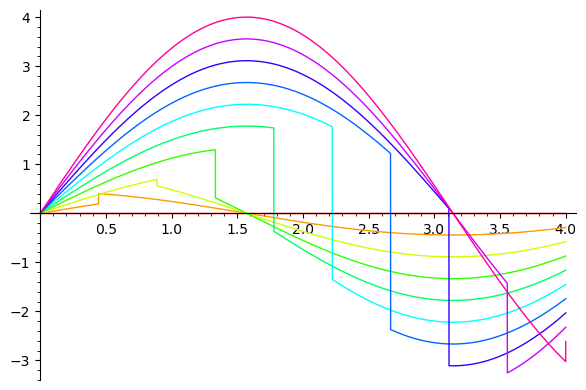

In [38]:
g = Graphics()
for i in range(10):
    a = 4/9*i
    g+=plot(lambda x: f2(x, a), (0,4), color=hue(i/10))
g

## Plot from data

Let us consider a list of values, of the type $(x_i, y_i)$:

In [39]:
data = [(numerical_approx(i/10, digits=2), numerical_approx(sin((i/10)^2))) 
        for i in range(1, 40)]
data

[(0.10, 0.00999983333416666),
 (0.20, 0.0399893341866342),
 (0.30, 0.0898785491980110),
 (0.40, 0.159318206614246),
 (0.50, 0.247403959254523),
 (0.60, 0.352274233275090),
 (0.70, 0.470625888171158),
 (0.80, 0.597195441362392),
 (0.90, 0.724287174370143),
 (1.0, 0.841470984807897),
 (1.1, 0.935616001553386),
 (1.2, 0.991458348191686),
 (1.3, 0.992903651094118),
 (1.4, 0.925211520788168),
 (1.5, 0.778073196887921),
 (1.6, 0.549355436427127),
 (1.7, 0.248946786673153),
 (1.8, -0.0982485937451087),
 (1.9, -0.451465752161423),
 (2.0, -0.756802495307928),
 (2.1, -0.954627771660216),
 (2.2, -0.991868757310913),
 (2.3, -0.837769480165098),
 (2.4, -0.499641883116902),
 (2.5, -0.0331792165475568),
 (2.6, 0.458951486377690),
 (2.7, 0.845133411657217),
 (2.8, 0.999902258547975),
 (2.9, 0.849363378505467),
 (3.0, 0.412118485241757),
 (3.1, -0.184164779400673),
 (3.2, -0.727877870349737),
 (3.3, -0.994432209303195),
 (3.4, -0.844895943776026),
 (3.5, -0.311119354981127),
 (3.6, 0.383542755412610),
 (3.7, 0.901675770066391),
 (3.8, 0.954495430240921),
 (3.9, 0.477637144914013)]

We can plot it with `list_plot`:

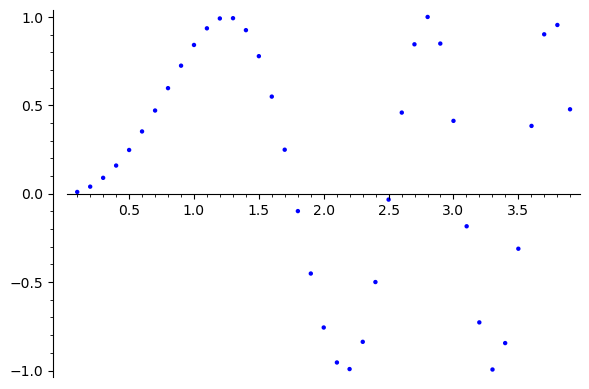

In [40]:
g1 = list_plot(data)
g1

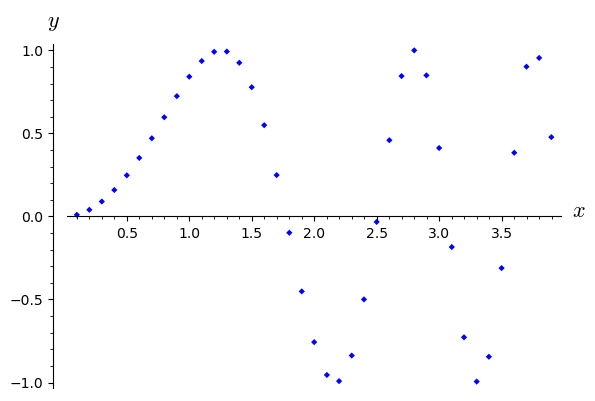

In [41]:
g1 = list_plot(data, marker='D', axes_labels=[r"$x$", r"$y$"])
g1

An alternative is to use `line`:

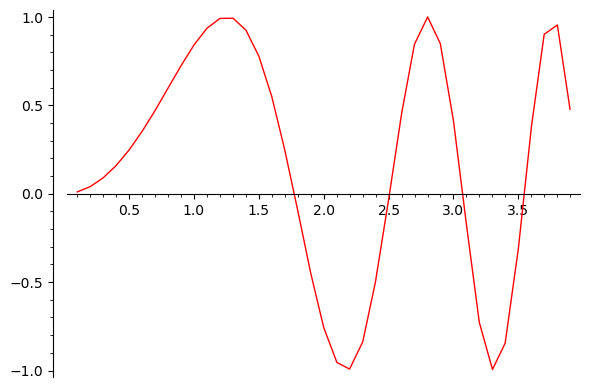

In [42]:
g2 = line(data, color='red')
g2

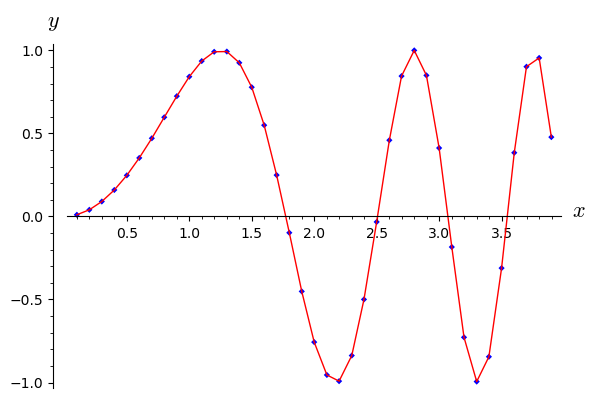

In [43]:
g1+g2

### Plotting data from a file

Suppose the data in stored in the file `data.d`, in a 2-column format ($x$ and $y$). We can have a look at the file by passing the bash command `cat` to the system, via the exclamation mark:

In [44]:
!cat data.d

  X     Y
0.10 0.00999983
0.20 0.0399893
0.30 0.0898786
0.40 0.159318
0.50 0.247404
0.60 0.352274
0.70 0.470626
0.80 0.597195
0.90 0.724287
1.00 0.841471
1.10 0.935616
1.20 0.991458
1.30 0.992904
1.40 0.925211
1.50 0.778073
1.60 0.549356
1.70 0.248947
1.80 -0.0982486
1.90 -0.451466
2.00 -0.756802
2.10 -0.954628
2.20 -0.991869
2.30 -0.837770
2.40 -0.499642
2.50 -0.0331792
2.60 0.458952
2.70 0.845133
2.80 0.999902
2.90 0.849363
3.00 0.412118
3.10 -0.184164
3.20 -0.727878
3.30 -0.994432
3.40 -0.844896
3.50 -0.311119
3.60 0.383543
3.70 0.901676
3.80 0.954496
3.90 0.477637


We then read the file and put its content in the list `data` and use `list_plot` to render it:

In [45]:
data = []  # empty list
with open("data.d", "r") as fi:   # open file in read-only mode ('r') 
    fi.readline()                 # skip first line (comments)
    for line in fi:               # loop on the file lines
        xs, ys = line.split(' ')  # xs, ys = strings separated by ' '
        data.append((float(xs), float(ys)))  # convert to float and add to the list
data

[(0.1, 0.00999983),
 (0.2, 0.0399893),
 (0.3, 0.0898786),
 (0.4, 0.159318),
 (0.5, 0.247404),
 (0.6, 0.352274),
 (0.7, 0.470626),
 (0.8, 0.597195),
 (0.9, 0.724287),
 (1.0, 0.841471),
 (1.1, 0.935616),
 (1.2, 0.991458),
 (1.3, 0.992904),
 (1.4, 0.925211),
 (1.5, 0.778073),
 (1.6, 0.549356),
 (1.7, 0.248947),
 (1.8, -0.0982486),
 (1.9, -0.451466),
 (2.0, -0.756802),
 (2.1, -0.954628),
 (2.2, -0.991869),
 (2.3, -0.83777),
 (2.4, -0.499642),
 (2.5, -0.0331792),
 (2.6, 0.458952),
 (2.7, 0.845133),
 (2.8, 0.999902),
 (2.9, 0.849363),
 (3.0, 0.412118),
 (3.1, -0.184164),
 (3.2, -0.727878),
 (3.3, -0.994432),
 (3.4, -0.844896),
 (3.5, -0.311119),
 (3.6, 0.383543),
 (3.7, 0.901676),
 (3.8, 0.954496),
 (3.9, 0.477637)]

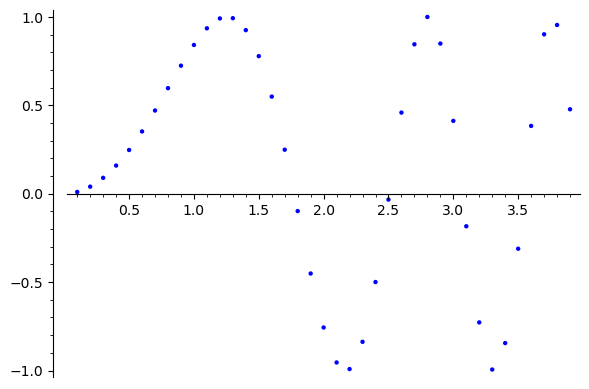

In [46]:
list_plot(data)

## Interactive plots

In [47]:
@interact
def _(a = slider([1..10]), 
        color=Color('red'),
        axes=checkbox(True, 'Show axes'), 
        x_label=input_box('$x$', 'x-label', str),
        y_label=input_box('$y$', 'y-label', str)):
    axes_labels = [x_label, y_label] if axes else None
    show(plot(cos(a*x), (x, 0, 2*pi), color=color, thickness=2), 
         axes=axes, axes_labels=axes_labels)

Interactive function <function _ at 0x7fa3ed2a75e0> with 5 widgets
  a: SelectionSlider(description='a', optio…